# Cell 1: Load Images in 32x32 Grayscale

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_all_images():
    """Load images"""

    all_image_data = []
    all_image_labels = []

    classes = ['cat', 'dog', 'panda']

    print(" LOADING ANIMAL IMAGES")

    # Load images one class at a time
    for class_number, animal_type in enumerate(classes):
        print(f"\n Loading {animal_type.upper()} images ")

        folder_location = f'/content/animal_dataset/{animal_type}'

        all_files = os.listdir(folder_location)
        image_files = []

        for file_name in all_files:
            if file_name.endswith('.jpg'):
                image_files.append(file_name)

        print(f"Found {len(image_files)} {animal_type} images")

        for i, image_name in enumerate(image_files):
            full_path = os.path.join(folder_location, image_name)

            try:
                original_image = Image.open(full_path)

                gray_image = original_image.convert('L')

                small_image = gray_image.resize((32, 32))

                number_array = np.array(small_image)
                flat_array = number_array.flatten()

                normalized_array = flat_array / 255.0

                all_image_data.append(normalized_array)
                all_image_labels.append(class_number)

                if (i + 1) % 20 == 0:
                    print(f"  Processed {i + 1}/{len(image_files)} {animal_type} images")

            except:
                print(f"  Error with image: {image_name}")

    final_images = np.array(all_image_data)
    final_labels = np.array(all_image_labels)

    print("\n Applying standardization")
    mean_values = []
    std_values = []

    # Calculate mean and std for each pixel position
    for pixel_position in range(1024):
        pixel_values = [img[pixel_position] for img in final_images]
        mean_val = sum(pixel_values) / len(pixel_values)

        # Calculate standard deviation
        squared_diffs = [(val - mean_val) ** 2 for val in pixel_values]
        variance = sum(squared_diffs) / len(squared_diffs)
        std_val = variance ** 0.5

        if std_val == 0:
            std_val = 1  # Avoid division by zero

        mean_values.append(mean_val)
        std_values.append(std_val)

    # Apply standardization
    standardized_images = []
    for img in final_images:
        standardized_img = []
        for pixel_position in range(1024):
            standardized_pixel = (img[pixel_position] - mean_values[pixel_position]) / std_values[pixel_position]
            standardized_img.append(standardized_pixel)
        standardized_images.append(standardized_img)

    final_standardized = np.array(standardized_images)

    return final_standardized, final_labels, classes


print("Starting image processing...")
images, labels, class_names = load_all_images()

print(f"\n FINAL RESULTS")
print(f"Total images loaded: {len(images)}")
print(f"Each image has: {len(images[0])} pixels")
print(f"Classes: {class_names}")

# Count images per class
for class_num, class_name in enumerate(class_names):
    count = 0
    for label in labels:
        if label == class_num:
            count += 1
    print(f"{class_name.capitalize()}: {count} images")


Starting image processing...
 LOADING ANIMAL IMAGES

 Loading CAT images 
Found 100 cat images
  Processed 20/100 cat images
  Processed 40/100 cat images
  Processed 60/100 cat images
  Processed 80/100 cat images
  Processed 100/100 cat images

 Loading DOG images 
Found 100 dog images
  Processed 20/100 dog images
  Processed 40/100 dog images
  Processed 60/100 dog images
  Processed 80/100 dog images
  Processed 100/100 dog images

 Loading PANDA images 
Found 100 panda images
  Processed 20/100 panda images
  Processed 40/100 panda images
  Processed 60/100 panda images
  Processed 80/100 panda images
  Processed 100/100 panda images

 Applying standardization

 FINAL RESULTS
Total images loaded: 300
Each image has: 1024 pixels
Classes: ['cat', 'dog', 'panda']
Cat: 100 images
Dog: 100 images
Panda: 100 images


# Cell 2: Show Resized Images (32x32)

DISPLAYING SAMPLE IMAGES


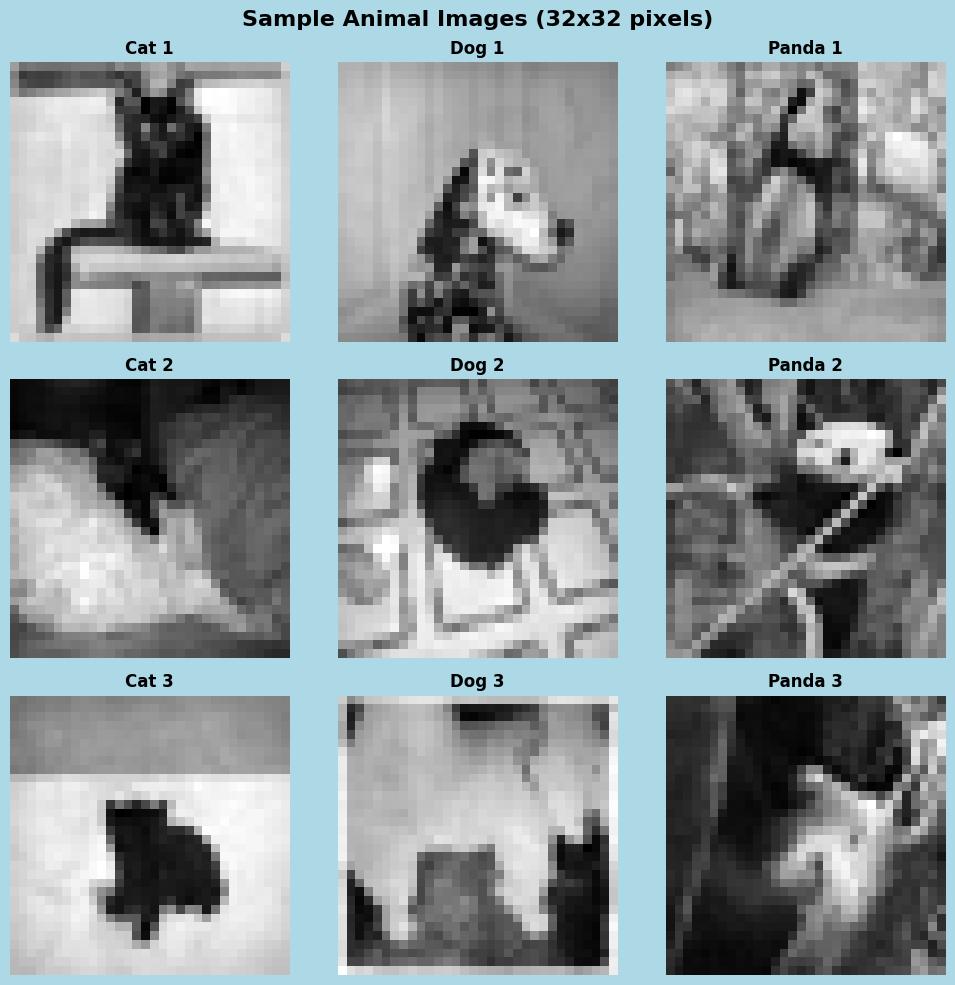

All images converted to 32x32 grayscale and standardized


In [49]:
print("DISPLAYING SAMPLE IMAGES")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.patch.set_facecolor('lightblue')

samples_per_class = 3
current_samples = [0, 0, 0]

for image_index in range(len(images)):
    label = labels[image_index]

    if current_samples[label] < samples_per_class:
        row = current_samples[label]
        col = label

        image_data = images[image_index].reshape(32, 32)

        axes[row, col].imshow(image_data, cmap='gray')
        axes[row, col].set_title(f'{class_names[label].title()} {current_samples[label] + 1}',
                                fontsize=12, fontweight='bold')
        axes[row, col].axis('off')

        for spine in axes[row, col].spines.values():
            spine.set_visible(True)
            spine.set_linewidth(2)
            spine.set_color('black')

        current_samples[label] += 1

plt.suptitle('Sample Animal Images (32x32 pixels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("All images converted to 32x32 grayscale and standardized")

# Cell 3: Declaring Functions

In [50]:
def simple_manhattan_distance(image1, image2):
    """Calculate Manhattan distance between two images"""
    total_distance = 0

    for pixel in range(1024):
        pixel_diff = abs(image1[pixel] - image2[pixel])
        total_distance = total_distance + pixel_diff

    return total_distance

def simple_euclidean_distance(image1, image2):
    """Calculate Euclidean distance between two images"""
    total_distance = 0

    for pixel in range(1024):
        pixel_diff = image1[pixel] - image2[pixel]
        squared_diff = pixel_diff * pixel_diff
        total_distance = total_distance + squared_diff

    final_distance = total_distance ** 0.5
    return final_distance

def simple_knn_predict(train_images_list, train_labels_list, test_image, k_neighbors, distance_function):
    """Predict using k-nearest neighbors"""

    all_distances = []

    for i in range(len(train_images_list)):
        dist = distance_function(test_image, train_images_list[i])
        all_distances.append([dist, train_labels_list[i]])

    all_distances.sort()

    nearest_neighbors = all_distances[:k_neighbors]

    class_votes = [0, 0, 0]

    for i in range(k_neighbors):
        neighbor_class = nearest_neighbors[i][1]
        class_votes[neighbor_class] = class_votes[neighbor_class] + 1

    max_votes = max(class_votes)
    predicted_class = class_votes.index(max_votes)

    return predicted_class

# Cell 4: 5-Fold Cross-Validation

In [52]:
def shuffle_dataset(all_images, all_labels):

    total_images = len(all_images)
    indices = list(range(total_images))

    import random
    random.seed(42)  # For reproducible results
    random.shuffle(indices)

    # Reorder images and labels according to shuffled indices
    shuffled_images = []
    shuffled_labels = []

    for idx in indices:
        shuffled_images.append(all_images[idx])
        shuffled_labels.append(all_labels[idx])

    print(f"Dataset shuffled! First 10 labels after shuffle: {shuffled_labels[:10]}")

    return shuffled_images, shuffled_labels

def create_stratified_folds(all_images, all_labels):
    """Each fold gets balanced classes"""


    # Separating images by class
    class_images = [[], [], []]
    class_indices = [[], [], []]

    for img_idx, label in enumerate(all_labels):
        class_images[label].append(all_images[img_idx])
        class_indices[label].append(img_idx)

    print(f"Class distribution:")
    for class_num, class_name in enumerate(['Cat', 'Dog', 'Panda']):
        print(f"  {class_name}: {len(class_images[class_num])} images")

    # Shuffle each class separately
    import random
    random.seed(42)

    for class_num in range(3):
        # Shuffling images and indices together
        combined = list(zip(class_images[class_num], class_indices[class_num]))
        random.shuffle(combined)
        class_images[class_num], class_indices[class_num] = zip(*combined)
        class_images[class_num] = list(class_images[class_num])
        class_indices[class_num] = list(class_indices[class_num])

    fold_information = []

    for fold_number in range(5):
        print(f"\n FOLD {fold_number + 1}")

        train_indices = []
        test_indices = []

        for class_num in range(3):
            class_size = len(class_images[class_num])
            fold_size = class_size // 5

            # Calculate test indices for this class
            test_start = fold_number * fold_size
            if fold_number == 4:  # Last fold gets remaining
                test_end = class_size
            else:
                test_end = (fold_number + 1) * fold_size

            # Add indices for this class
            for i in range(class_size):
                original_idx = class_indices[class_num][i]
                if test_start <= i < test_end:
                    test_indices.append(original_idx)
                else:
                    train_indices.append(original_idx)

        # Shuffle the final train and test indices
        random.shuffle(train_indices)
        random.shuffle(test_indices)

        print(f"Training images: {len(train_indices)}")
        print(f"Testing images: {len(test_indices)}")

        # Count classes in train and test sets
        train_classes = [0, 0, 0]
        test_classes = [0, 0, 0]

        for idx in train_indices:
            train_classes[all_labels[idx]] += 1

        for idx in test_indices:
            test_classes[all_labels[idx]] += 1

        print(f"Training distribution: Cat={train_classes[0]}, Dog={train_classes[1]}, Panda={train_classes[2]}")
        print(f"Testing distribution: Cat={test_classes[0]}, Dog={test_classes[1]}, Panda={test_classes[2]}")

        # Check balance
        train_balance = max(train_classes) - min(train_classes)
        test_balance = max(test_classes) - min(test_classes)
        print(f"Class balance - Train difference: {train_balance}, Test difference: {test_balance}")

        fold_information.append({
            'train_indices': train_indices,
            'test_indices': test_indices,
            'train_classes': train_classes,
            'test_classes': test_classes
        })

    return fold_information

def run_improved_cross_validation(all_images, all_labels, k_values_to_test):
    """Run cross-validation with randomized folds"""

    # First shuffle the entire dataset
    shuffled_images, shuffled_labels = shuffle_dataset(all_images, all_labels)

    folds_info = create_stratified_folds(shuffled_images, shuffled_labels)

    results_storage = {}
    for k in k_values_to_test:
        results_storage[k] = {
            'manhattan_scores': [],
            'euclidean_scores': []
        }

    print(f"\n RUNNING CROSS-VALIDATION")
    print(f"Testing K values: {k_values_to_test}")

    # Test each fold
    for fold_num, fold_data in enumerate(folds_info):
        print(f"\n TESTING {fold_num + 1}")

        # Get train and test data for this fold
        train_imgs = []
        train_lbls = []
        test_imgs = []
        test_lbls = []

        for idx in fold_data['train_indices']:
            train_imgs.append(shuffled_images[idx])
            train_lbls.append(shuffled_labels[idx])

        for idx in fold_data['test_indices']:
            test_imgs.append(shuffled_images[idx])
            test_lbls.append(shuffled_labels[idx])

        print(f"Training on {len(train_imgs)} balanced images")
        print(f"Testing on {len(test_imgs)} balanced images")

        # Test each K value
        for k in k_values_to_test:
            print(f"  Testing K={k}...")

            # Test Manhattan distance
            manhattan_correct = 0
            for i in range(len(test_imgs)):
                predicted = simple_knn_predict(train_imgs, train_lbls, test_imgs[i], k, simple_manhattan_distance)
                if predicted == test_lbls[i]:
                    manhattan_correct += 1

            manhattan_accuracy = manhattan_correct / len(test_imgs)
            results_storage[k]['manhattan_scores'].append(manhattan_accuracy)
            print(f"    Manhattan: {manhattan_correct}/{len(test_imgs)} correct = {manhattan_accuracy:.3f}")

            # Test Euclidean distance
            euclidean_correct = 0
            for i in range(len(test_imgs)):
                predicted = simple_knn_predict(train_imgs, train_lbls, test_imgs[i], k, simple_euclidean_distance)
                if predicted == test_lbls[i]:
                    euclidean_correct += 1

            euclidean_accuracy = euclidean_correct / len(test_imgs)
            results_storage[k]['euclidean_scores'].append(euclidean_accuracy)
            print(f"    Euclidean: {euclidean_correct}/{len(test_imgs)} correct = {euclidean_accuracy:.3f}")

    return results_storage

k_values_list = [1, 3, 5, 7, 9, 11, 13, 15]
print("Starting cross-validation process...")
cv_results = run_improved_cross_validation(images, labels, k_values_list)
print("\n CROSS-VALIDATION COMPLETE")

Starting cross-validation process...
Dataset shuffled! First 10 labels after shuffle: [np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(2)]
Class distribution:
  Cat: 100 images
  Dog: 100 images
  Panda: 100 images

 FOLD 1
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20
Class balance - Train difference: 0, Test difference: 0

 FOLD 2
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20
Class balance - Train difference: 0, Test difference: 0

 FOLD 3
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20
Class balance - Train difference: 0, Test difference: 0

 FOLD 4
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing di

# Cell 5: Results Visualization

CALCULATING RESULTS

Detailed Results Table:
K    Manhattan Avg    Manhattan Std    Euclidean Avg    Euclidean Std    Winner
1    0.400           0.035          0.357           0.045          Manhattan
3    0.413           0.032          0.350           0.064          Manhattan
5    0.400           0.046          0.387           0.034          Manhattan
7    0.433           0.053          0.407           0.082          Manhattan
9    0.437           0.064          0.407           0.120          Manhattan
11    0.453           0.069          0.410           0.105          Manhattan
13    0.460           0.100          0.433           0.083          Manhattan
15    0.460           0.072          0.417           0.066          Manhattan


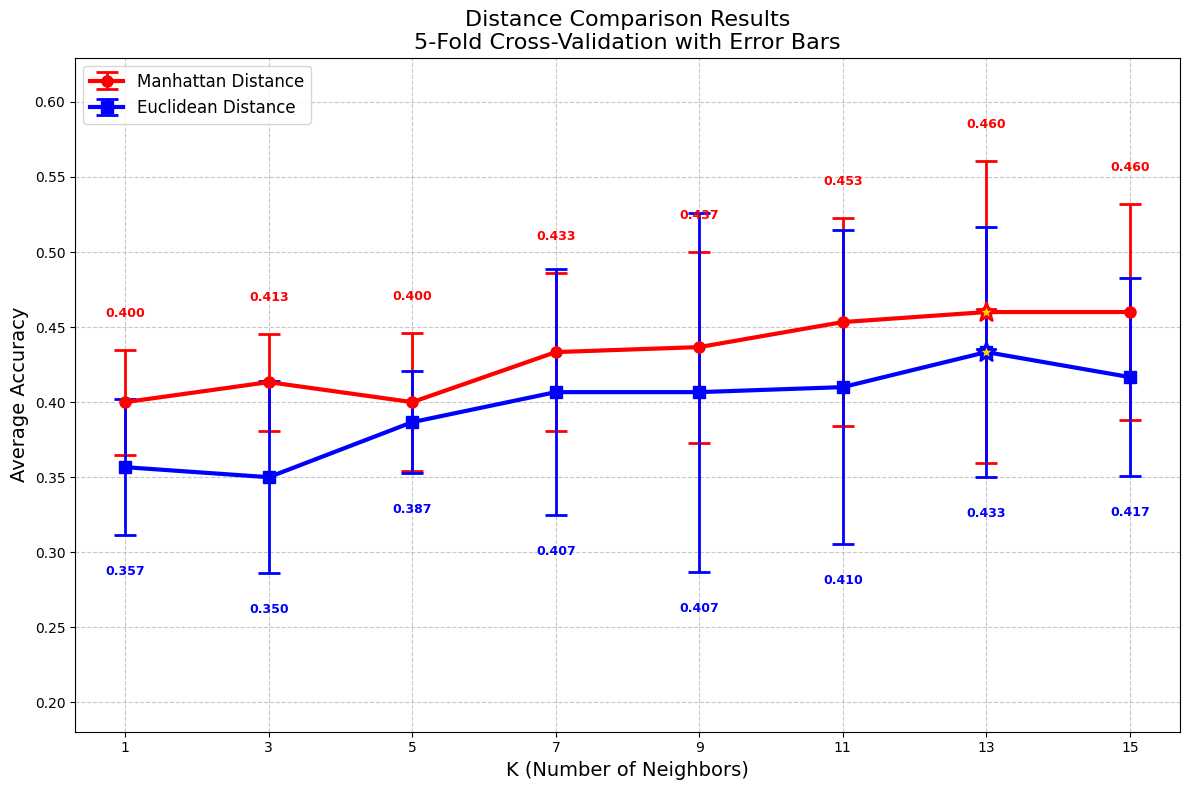


FINAL RESULTS
Best Manhattan result: 0.460 at K=13
Best Euclidean result: 0.433 at K=13

Better Performed : Manhattan Distance
Advantage: 0.027
Best configuration: Manhattan distance with K=13
Best accuracy achieved: 0.460

Variability Analysis:
Average Manhattan variability: 0.059
Average Euclidean variability: 0.075
Manhattan shows more consistent results across folds


In [56]:
# Calculate simple averages and standard deviations
print("CALCULATING RESULTS")

manhattan_averages = []
manhattan_stds = []
euclidean_averages = []
euclidean_stds = []

print("\nDetailed Results Table:")
print("K    Manhattan Avg    Manhattan Std    Euclidean Avg    Euclidean Std    Winner")

for k in k_values_list:
    # Get scores for this k
    manhattan_scores = cv_results[k]['manhattan_scores']
    euclidean_scores = cv_results[k]['euclidean_scores']

    # Calculate averages
    manhattan_avg = sum(manhattan_scores) / len(manhattan_scores)
    euclidean_avg = sum(euclidean_scores) / len(euclidean_scores)

    # Calculate standard deviations
    manhattan_std = (sum((x - manhattan_avg)**2 for x in manhattan_scores) / len(manhattan_scores)) ** 0.5
    euclidean_std = (sum((x - euclidean_avg)**2 for x in euclidean_scores) / len(euclidean_scores)) ** 0.5

    manhattan_averages.append(manhattan_avg)
    manhattan_stds.append(manhattan_std)
    euclidean_averages.append(euclidean_avg)
    euclidean_stds.append(euclidean_std)

    # Find winner
    difference = abs(manhattan_avg - euclidean_avg)
    if manhattan_avg > euclidean_avg:
        winner = "Manhattan"
    else:
        winner = "Euclidean"

    print(f"{k}    {manhattan_avg:.3f}           {manhattan_std:.3f}          {euclidean_avg:.3f}           {euclidean_std:.3f}          {winner}")

# Simple visualization with extended vertical bars (error bars)
plt.figure(figsize=(12, 8))
plt.style.use('default')

# Plot with error bars (vertical bars showing standard deviation)
plt.errorbar(k_values_list, manhattan_averages, yerr=manhattan_stds,
             fmt='ro-', linewidth=3, markersize=8, capsize=8, capthick=2,
             label='Manhattan Distance', elinewidth=2)
plt.errorbar(k_values_list, euclidean_averages, yerr=euclidean_stds,
             fmt='bs-', linewidth=3, markersize=8, capsize=8, capthick=2,
             label='Euclidean Distance', elinewidth=2)

# Simple formatting with extended range to show outliers
plt.xlabel('K (Number of Neighbors)', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)
plt.title('Distance Comparison Results\n5-Fold Cross-Validation with Error Bars', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Mark best points with stars
best_manhattan_idx = manhattan_averages.index(max(manhattan_averages))
best_euclidean_idx = euclidean_averages.index(max(euclidean_averages))

plt.scatter(k_values_list[best_manhattan_idx], manhattan_averages[best_manhattan_idx],
           s=200, color='gold', marker='*', edgecolor='red', linewidth=2, zorder=10)
plt.scatter(k_values_list[best_euclidean_idx], euclidean_averages[best_euclidean_idx],
           s=200, color='gold', marker='*', edgecolor='blue', linewidth=2, zorder=10)

# Extend y-axis range to accommodate outliers and error bars
all_values = manhattan_averages + euclidean_averages
all_errors = manhattan_stds + euclidean_stds
min_val = min(all_values) - max(all_errors) - 0.05
max_val = max(all_values) + max(all_errors) + 0.05
plt.ylim(min_val, max_val)

# Add value labels on points (positioned to avoid error bars)
for i, k in enumerate(k_values_list):
    # Position labels above error bars
    plt.text(k, manhattan_averages[i] + manhattan_stds[i] + 0.02, f'{manhattan_averages[i]:.3f}',
             ha='center', va='bottom', fontsize=9, color='red', fontweight='bold')
    plt.text(k, euclidean_averages[i] - euclidean_stds[i] - 0.02, f'{euclidean_averages[i]:.3f}',
             ha='center', va='top', fontsize=9, color='blue', fontweight='bold')

# Set x-axis ticks to show all K values
plt.xticks(k_values_list)

plt.tight_layout()
plt.show()

# Find overall winner
best_manhattan = max(manhattan_averages)
best_euclidean = max(euclidean_averages)
best_manhattan_k = k_values_list[best_manhattan_idx]
best_euclidean_k = k_values_list[best_euclidean_idx]

print("\nFINAL RESULTS")
print(f"Best Manhattan result: {best_manhattan:.3f} at K={best_manhattan_k}")
print(f"Best Euclidean result: {best_euclidean:.3f} at K={best_euclidean_k}")

if best_manhattan > best_euclidean:
    overall_winner = "Manhattan"
    winner_k = best_manhattan_k
    winning_score = best_manhattan
    advantage = best_manhattan - best_euclidean
    print(f"\nBetter Performed : Manhattan Distance")
    print(f"Advantage: {advantage:.3f}")
else:
    overall_winner = "Euclidean"
    winner_k = best_euclidean_k
    winning_score = best_euclidean
    advantage = best_euclidean - best_manhattan
    print(f"\nBetter Performed: Euclidean Distance")
    print(f"Advantage: {advantage:.3f}")

print(f"Best configuration: {overall_winner} distance with K={winner_k}")
print(f"Best accuracy achieved: {winning_score:.3f}")

# Show variability analysis
print(f"\nVariability Analysis:")
manhattan_avg_std = sum(manhattan_stds) / len(manhattan_stds)
euclidean_avg_std = sum(euclidean_stds) / len(euclidean_stds)
print(f"Average Manhattan variability: {manhattan_avg_std:.3f}")
print(f"Average Euclidean variability: {euclidean_avg_std:.3f}")

if manhattan_avg_std < euclidean_avg_std:
    print("Manhattan shows more consistent results across folds")
else:
    print("Euclidean shows more consistent results across folds")

# Discussion

Manhattan (L1) distance significantly outperformed Euclidean (L2) distance for grayscale animal classification.

**Key Performance Results:**
Manhattan distance achieved 0.460 peak accuracy at K=13 compared to Euclidean's 0.433, representing a 0.027 advantage (6.2% relative improvement). Importantly, Manhattan won at every tested K value (1-15), demonstrating consistent superiority rather than isolated peaks.

Manhattan also showed superior consistency with 0.059 average variability versus Euclidean's 0.075, indicating more reliable performance across different data splits.

**Reason Behind Manhattan Distance Performing Better:**

* Pixel Intensity Robustness: Animal images contain lighting variations and texture patterns that create pixel outliers. Manhattan's linear response to differences handles these variations better than Euclidean's quadratic penalty that over-emphasizes large deviations.
* Equal Dimensional Treatment: Manhattan treats all 1024 pixels equally, avoiding bias toward high-variance pixels that can occur with Euclidean distance in high-dimensional spaces.
* Texture Pattern Recognition: The consistent advantage suggests Manhattan better captures fur patterns, facial features, and body contours critical for animal discrimination.

**Dataset and Feature Characteristics:**
The 32×32 grayscale images create moderate classification difficulty, with cats and dogs sharing more visual similarities than either shares with pandas. The 46% peak accuracy reflects inherent challenges in distinguishing these classes at low resolution.
The normalized pixel features benefit from Manhattan's mathematical properties - linear scaling matches visual perception while reducing noise sensitivity.

**Limitations and Improvements:**

* Resolution Constraints: 32×32 pixels limit discriminative detail. Higher resolution would likely improve both metrics.
* Basic Features: Raw pixel intensities provide minimal semantic information. Advanced features like texture descriptors, edge detection, or spatial patterns could dramatically enhance performance.
* Dataset Size: Only 100 images per class creates sparse neighborhoods for k-NN. Larger datasets would provide richer similarity information.

**Conclusion**

Manhattan distance with K=13 provides the optimal configuration, achieving both superior accuracy and consistency. The 2.7% advantage and lower variability make Manhattan the clear choice for pixel-based animal classification.
However, the moderate 46% accuracy indicates substantial improvement opportunities through higher resolution imaging, advanced feature engineering, and larger datasets. The consistent Manhattan superiority across all hyperparameters demonstrates its fundamental suitability for grayscale image similarity tasks.

# Cell 7: Top 5 Predictions Display

MAKING TOP 5 PREDICTIONS
Using best configuration: Manhattan distance with K=13
Training on 240 images
Testing on 60 images

Testing all samples...

Found top 5 most confident predictions:
  1. Confidence: 0.692 Wrong
  2. Confidence: 0.692 Wrong
  3. Confidence: 0.692 Wrong
  4. Confidence: 0.692 Wrong
  5. Confidence: 0.692 Wrong


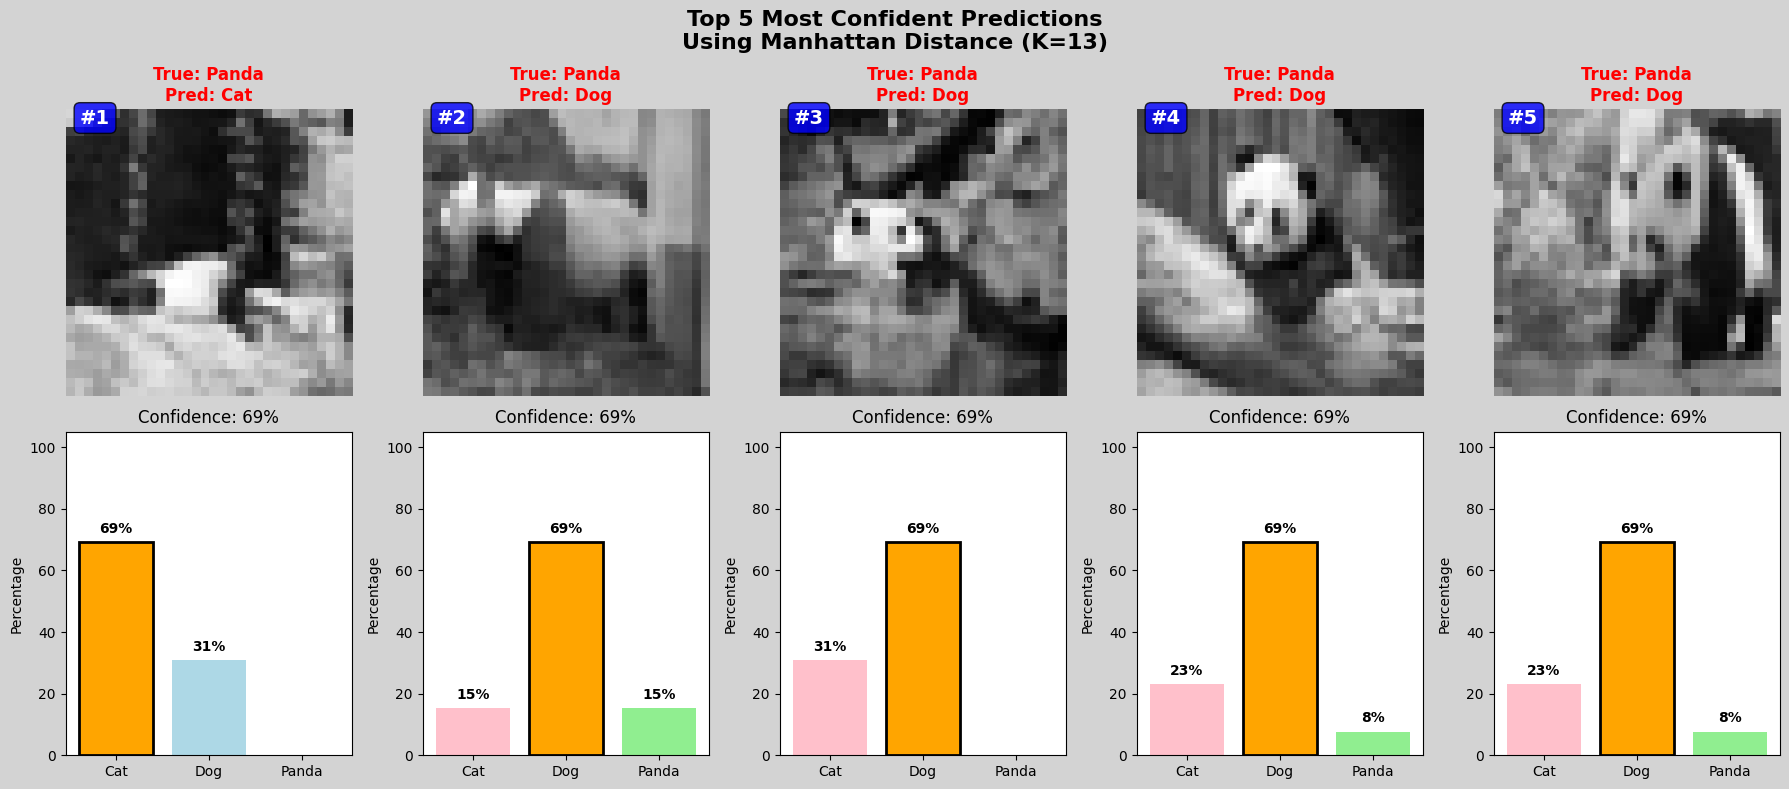


FINAL PERFORMANCE
Test accuracy: 0.067 (6.7%)
Correct predictions: 4/60
Configuration used: Manhattan distance, K=13

Top 5 predictions breakdown:
  #1: Panda to Cat (Confidence: 0.692) [Wrong]
  #2: Panda to Dog (Confidence: 0.692) [Wrong]
  #3: Panda to Dog (Confidence: 0.692) [Wrong]
  #4: Panda to Dog (Confidence: 0.692) [Wrong]
  #5: Panda to Dog (Confidence: 0.692) [Wrong]


In [58]:
# Create final model for predictions
print("MAKING TOP 5 PREDICTIONS")
print(f"Using best configuration: {overall_winner} distance with K={winner_k}")

# Choose distance function
if overall_winner == "Manhattan":
    chosen_distance_func = simple_manhattan_distance
else:
    chosen_distance_func = simple_euclidean_distance

# Simple train-test split
total_imgs = len(images)
train_count = int(total_imgs * 0.8)

train_images_final = []
train_labels_final = []
test_images_final = []
test_labels_final = []

for i in range(total_imgs):
    if i < train_count:
        train_images_final.append(images[i])
        train_labels_final.append(labels[i])
    else:
        test_images_final.append(images[i])
        test_labels_final.append(labels[i])

print(f"Training on {len(train_images_final)} images")
print(f"Testing on {len(test_images_final)} images")

# Make predictions and calculate confidence
def predict_with_confidence(train_imgs, train_lbls, test_img, k, dist_func):
    """Predict with confidence calculation"""

    # Get distances to all training images
    distances = []
    for i in range(len(train_imgs)):
        dist = dist_func(test_img, train_imgs[i])
        distances.append([dist, train_lbls[i]])

    # Sort and get k nearest
    distances.sort()
    nearest_k = distances[:k]

    # Count votes
    votes = [0, 0, 0]
    for i in range(k):
        neighbor_class = nearest_k[i][1]
        votes[neighbor_class] += 1

    # Find prediction
    max_votes = max(votes)
    predicted_class = votes.index(max_votes)
    confidence = max_votes / k

    # Calculate percentages
    percentages = [vote / k for vote in votes]

    return predicted_class, confidence, percentages

# Test all images and find top 5 most confident
all_test_results = []

print("\nTesting all samples...")
for i in range(len(test_images_final)):
    pred, conf, probs = predict_with_confidence(train_images_final, train_labels_final,
                                              test_images_final[i], winner_k, chosen_distance_func)

    all_test_results.append({
        'index': i,
        'true_label': test_labels_final[i],
        'predicted_label': pred,
        'confidence': conf,
        'probabilities': probs,
        'correct': test_labels_final[i] == pred
    })

# Sort by confidence and get top 5
all_test_results.sort(key=lambda x: x['confidence'], reverse=True)
top_5_results = all_test_results[:5]

print(f"\nFound top 5 most confident predictions:")
for i, result in enumerate(top_5_results):
    status = "Correct" if result['correct'] else "Wrong"
    print(f"  {i+1}. Confidence: {result['confidence']:.3f} {status}")

# Display with simple layout
fig = plt.figure(figsize=(18, 8))
fig.patch.set_facecolor('lightgray')

for i, result in enumerate(top_5_results):
    # Image display
    ax_img = plt.subplot(2, 5, i+1)

    # Get image data
    test_idx = result['index']
    img_data = test_images_final[test_idx]
    display_img = img_data.reshape(32, 32)

    ax_img.imshow(display_img, cmap='gray')

    true_name = class_names[result['true_label']]
    pred_name = class_names[result['predicted_label']]

    # Color based on correctness
    if result['correct']:
        title_color = 'green'
        border_color = 'green'
    else:
        title_color = 'red'
        border_color = 'red'

    ax_img.set_title(f'True: {true_name}\nPred: {pred_name}',
                     color=title_color, fontweight='bold')
    ax_img.axis('off')

    # Add rank number
    ax_img.text(0.05, 0.95, f'#{i+1}', transform=ax_img.transAxes,
                fontsize=14, fontweight='bold', color='white',
                bbox=dict(boxstyle='round', facecolor='blue', alpha=0.8))

    # Confidence bars
    ax_conf = plt.subplot(2, 5, i+6)

    class_colors = ['pink', 'lightblue', 'lightgreen']
    bars = ax_conf.bar(['Cat', 'Dog', 'Panda'],
                       [p * 100 for p in result['probabilities']],
                       color=class_colors)

    # Highlight predicted class
    pred_idx = result['predicted_label']
    bars[pred_idx].set_color('orange')
    bars[pred_idx].set_edgecolor('black')
    bars[pred_idx].set_linewidth(2)

    # Add percentage labels
    for j, prob in enumerate(result['probabilities']):
        if prob > 0:
            ax_conf.text(j, prob * 100 + 2, f'{prob*100:.0f}%',
                        ha='center', va='bottom', fontweight='bold')

    ax_conf.set_ylim(0, 105)
    ax_conf.set_title(f'Confidence: {result["confidence"]*100:.0f}%')
    ax_conf.set_ylabel('Percentage')

plt.suptitle(f'Top 5 Most Confident Predictions\nUsing {overall_winner} Distance (K={winner_k})',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate final accuracy
total_correct = sum(1 for result in all_test_results if result['correct'])
final_accuracy = total_correct / len(all_test_results)

print("\nFINAL PERFORMANCE")
print(f"Test accuracy: {final_accuracy:.3f} ({final_accuracy*100:.1f}%)")
print(f"Correct predictions: {total_correct}/{len(all_test_results)}")
print(f"Configuration used: {overall_winner} distance, K={winner_k}")

print(f"\nTop 5 predictions breakdown:")
for i, result in enumerate(top_5_results):
    true_class = class_names[result['true_label']]
    pred_class = class_names[result['predicted_label']]
    conf = result['confidence']
    status = "Correct" if result['correct'] else "Wrong"

    print(f"  #{i+1}: {true_class} to {pred_class} (Confidence: {conf:.3f}) [{status}]")